Confusion Matrix:
 [[41  2]
 [ 1 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC AUC Score: 0.99737962659679


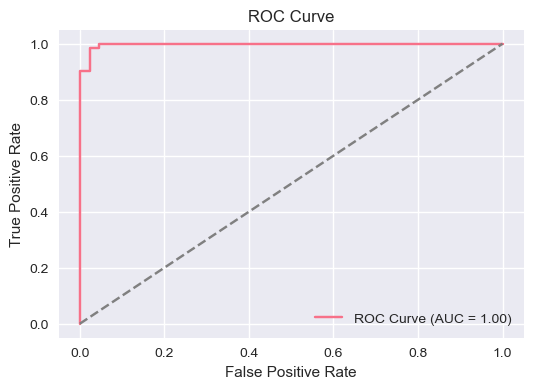


Confusion Matrix (Threshold = 0.6):
 [[42  1]
 [ 1 70]]

Sigmoid Function Explanation:

The sigmoid function is used to map the linear output (z) of the logistic regression model
to a probability between 0 and 1. This probability reflects the model's confidence
that a given input belongs to the positive class (benign tumor in this case).

Formula: sigmoid(z) = 1 / (1 + e^(-z))

This probability is compared to a threshold (usually 0.5) to make the final decision.



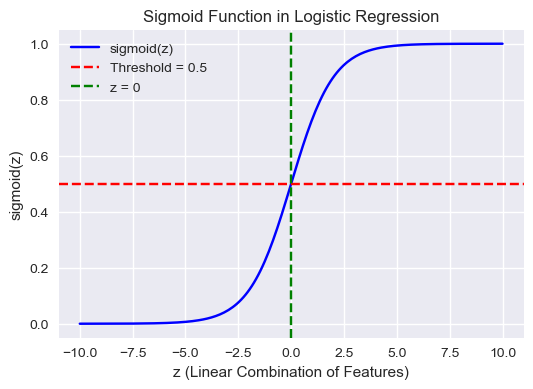


--- Inference on Sample #5 ---
True Label: Malignant (0)
Linear Output (z): -23.0792
Sigmoid Output (Probability of Benign): 0.0000
Prediction (Threshold = 0.6): Malignant (0)

Interpretation:
- The model computes a linear combination of the input features (z).
- The sigmoid function transforms z into a probability between 0 and 1.
- If the probability is above the threshold (e.g., 0.6), the model predicts 'Benign'.
- This process is repeated for each patient to classify their tumor as malignant or benign.



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label="ROC Curve (AUC = %0.2f)" % roc_auc_score(y_test, y_prob))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

threshold = 0.6
y_pred_custom = (y_prob >= threshold).astype(int)
print(f"\nConfusion Matrix (Threshold = {threshold}):\n", confusion_matrix(y_test, y_pred_custom))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

print("\nSigmoid Function Explanation:")
print("""
The sigmoid function is used to map the linear output (z) of the logistic regression model
to a probability between 0 and 1. This probability reflects the model's confidence
that a given input belongs to the positive class (benign tumor in this case).

Formula: sigmoid(z) = 1 / (1 + e^(-z))

This probability is compared to a threshold (usually 0.5) to make the final decision.
""")

z_vals = np.linspace(-10, 10, 200)
sig_vals = sigmoid(z_vals)

plt.figure(figsize=(6, 4))
plt.plot(z_vals, sig_vals, label='sigmoid(z)', color='blue')
plt.axhline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.axvline(0, color='green', linestyle='--', label='z = 0')
plt.xlabel("z (Linear Combination of Features)")
plt.ylabel("sigmoid(z)")
plt.title("Sigmoid Function in Logistic Regression")
plt.grid(True)
plt.legend()
plt.show()

sample_index = 5
sample_features = X_test_scaled[sample_index]
true_label = y_test.values[sample_index]

z = np.dot(model.coef_, sample_features) + model.intercept_
z = z[0]
probability = sigmoid(z)
prediction = int(probability >= threshold)

print(f"\n--- Inference on Sample #{sample_index} ---")
print(f"True Label: {'Benign (1)' if true_label == 1 else 'Malignant (0)'}")
print(f"Linear Output (z): {z:.4f}")
print(f"Sigmoid Output (Probability of Benign): {probability:.4f}")
print(f"Prediction (Threshold = {threshold}): {'Benign (1)' if prediction == 1 else 'Malignant (0)'}")

print("""
Interpretation:
- The model computes a linear combination of the input features (z).
- The sigmoid function transforms z into a probability between 0 and 1.
- If the probability is above the threshold (e.g., 0.6), the model predicts 'Benign'.
- This process is repeated for each patient to classify their tumor as malignant or benign.
""")
